In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import PIL

import pathlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
!unzip /content/drive/MyDrive/DL_CNN.zip

In [3]:
data_dir = ("/content/DL_CNN")
print(data_dir)

/content/DL_CNN


In [4]:
data_dir = pathlib.Path("/content/DL_CNN")
print(data_dir)
list(data_dir.glob('*/*.jpg'))[:5]

/content/DL_CNN


[PosixPath('/content/DL_CNN/Cat/5479.jpg'),
 PosixPath('/content/DL_CNN/Cat/2970.jpg'),
 PosixPath('/content/DL_CNN/Cat/2339.jpg'),
 PosixPath('/content/DL_CNN/Cat/7381.jpg'),
 PosixPath('/content/DL_CNN/Cat/7352.jpg')]

In [5]:
dogs = list(data_dir.glob('Dog/*'))
dogs[:5]

[PosixPath('/content/DL_CNN/Dog/2339.jpg'),
 PosixPath('/content/DL_CNN/Dog/8729.jpg'),
 PosixPath('/content/DL_CNN/Dog/2636.jpg'),
 PosixPath('/content/DL_CNN/Dog/5795.jpg'),
 PosixPath('/content/DL_CNN/Dog/1462.jpg')]

In [6]:
cats = list(data_dir.glob('Cat/*'))
cats[:5]

[PosixPath('/content/DL_CNN/Cat/5479.jpg'),
 PosixPath('/content/DL_CNN/Cat/2970.jpg'),
 PosixPath('/content/DL_CNN/Cat/2339.jpg'),
 PosixPath('/content/DL_CNN/Cat/7381.jpg'),
 PosixPath('/content/DL_CNN/Cat/7352.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

13638


In [8]:
X, Y = [], []

In [ ]:
PIL.Image.open(str(dogs[1]))

In [10]:
pet_images_dict = {
    'cats': list(data_dir.glob('Cat/*')),
    'dogs': list(data_dir.glob('Dog/*')),
}

pet_labels_dict = {
    'cats': 0,
    'dogs': 1,
}

In [11]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
X, Y = [], []

for pet_name, images in pet_images_dict.items():
    print(pet_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            #print('image not found')
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(pet_labels_dict[pet_name])
        else:
            #print("Invalid Image")
            continue

cats
dogs


In [12]:
X = np.array(X)
Y = np.array(Y)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape) 
print(Y_test.shape)

9855 9855
3286 3286
(9855, 150, 150, 3)
(9855,)
(3286, 150, 150, 3)
(3286,)


In [14]:
len(Y_test)

3286

In [44]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 4)       112       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 4)         148       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 4)         148       
                                                                 
 flatten_5 (Flatten)         (None, 4624)             

In [46]:
mkdir CNN-Model

mkdir: cannot create directory ‘CNN-Model’: File exists


In [47]:
backup_dir = "/content/CNN-Model"

In [48]:
import tensorflow as tf
call_backs = [tf.keras.callbacks.TensorBoard(log_dir='./reduced8'),
              tf.keras.callbacks.BackupAndRestore(backup_dir),
              tf.keras.callbacks.ModelCheckpoint("/content/CNN-Model",monitor="val_loss",save_best_only=True,save_weights_only=True,mode="auto",save_freq="epoch",
    
)]

In [49]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=15,validation_data=(X_test, Y_test),callbacks = call_backs)

Epoch 10/15
308/308 [==============================] - 5s 14ms/step - loss: 0.2899 - accuracy: 0.9160 - val_loss: 0.2832 - val_accuracy: 0.9184
Epoch 11/15
308/308 [==============================] - 4s 12ms/step - loss: 0.2887 - accuracy: 0.9160 - val_loss: 0.2831 - val_accuracy: 0.9184
Epoch 12/15
308/308 [==============================] - 4s 12ms/step - loss: 0.2886 - accuracy: 0.9160 - val_loss: 0.2827 - val_accuracy: 0.9184
Epoch 13/15
308/308 [==============================] - 4s 12ms/step - loss: 0.2887 - accuracy: 0.9160 - val_loss: 0.2826 - val_accuracy: 0.9184
Epoch 14/15
308/308 [==============================] - 4s 11ms/step - loss: 0.2886 - accuracy: 0.9160 - val_loss: 0.2826 - val_accuracy: 0.9184
Epoch 15/15
308/308 [==============================] - 4s 13ms/step - loss: 0.2887 - accuracy: 0.9160 - val_loss: 0.2826 - val_accuracy: 0.9184


In [ ]:
model.save('cnn_catvsdog.h5')

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  Y_test)

103/103 [==============================] - 1s 6ms/step - loss: 0.6676 - accuracy: 0.8694


In [ ]:
test_acc*100

86.94461584091187

In [ ]:
x = model.predict(X_test)

In [ ]:
x

array([[1.2786014e-01],
       [7.4671054e-01],
       [2.5316641e-07],
       ...,
       [6.4983493e-01],
       [2.6352942e-02],
       [3.5700354e-01]], dtype=float32)

In [ ]:
model.predict(X_test[:2])

array([[0.12786005],
       [0.7467105 ]], dtype=float32)

In [ ]:
print(x[10])

[0.19007336]


In [ ]:
print(x.shape)

(3286, 1)


In [ ]:


x[0]

array([0.12786014], dtype=float32)

In [ ]:
m = ("/content/cnn_catvsdog.h5")
m

'/content/cnn_catvsdog.h5'

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:

import tensorflow as tf
import datetime

In [ ]:
%tensorboard --logdir reduced7/fit

<IPython.core.display.Javascript object>

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6011: logdir reduced6/fit (started 0:04:28 ago; pid 2011)
  - port 6010: logdir reduced5/fit (started 0:08:03 ago; pid 1781)
  - port 6007: logdir log/fit (started 0:38:34 ago; pid 869)
  - port 6008: logdir reduced3/fit (started 0:23:44 ago; pid 1235)
  - port 6006: logdir reduced2/fit (started 0:43:53 ago; pid 757)
  - port 6009: logdir reduced4/fit (started 0:12:07 ago; pid 1554)
  - port 6012: logdir reduced7/fit (started 0:00:01 ago; pid 2237)


In [ ]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir reduced2/fit (started 0:43:53 ago; port 6006, pid 757).


<IPython.core.display.Javascript object>

In [ ]:
!tensorboard dev upload \
  --logdir reduced7 \
  --name "CATVSDOG_CNN" \
  --description "TB" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/ivKkF3YoR0eOUjeQd6jB8g/

[2022-09-07T12:02:00] Started scanning logdir.
[2022-09-07T12:02:02] Total uploaded: 90 scalars, 0 tensors, 1 binary objects (46.8 kB)
[2022-09-07T12:02:02] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/ivKkF3YoR0eOUjeQd6jB8g/


In [ ]:
cat_dir = ("/content/drive/MyDrive/CAT")

In [ ]:
cat_dir = pathlib.Path("/content/drive/MyDrive/CAT")
cat_dir

PosixPath('/content/drive/MyDrive/CAT')

In [ ]:
 d = list(cat_dir.glob('*.jpg'))

In [ ]:
dict = { 'c' : list(cat_dir.glob('*.jpg'))}


In [ ]:
X_t = np.array(d)

In [ ]:
x = model.predict(X_t)

ValueError: ignored

In [ ]:
from PIL import Image
img = Image.fromarray(X_test[10],"RGB")
img.save("test_img.png")
img.show()

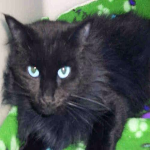

In [ ]:
PIL.Image.open(str("test_img.png"))